### Pima dataset Indian
Limitation of using the dataset is that it favours only one gender that is **Female**.
#### Welcomed to the presentation, feel free to ask any Question

This notebook has been prepaired by Me Joseph Owino


# Import all Libraries

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import missingno as msno
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#!pip install mlxtend
#!pip install missingno


In [47]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(30)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Get the number of rows in the dataset
num_rows = diabetes_df.shape[0]

# Print the number of rows
print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 768


In [10]:
diabetes_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [48]:
diabetes_df.isnull().head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [12]:
diabetes_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualisation of Data

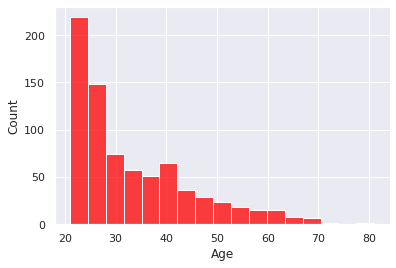

In [46]:
#Distribution plot for Age column
sns.histplot(data=diabetes_df["Age"],color="red")
plt.show()

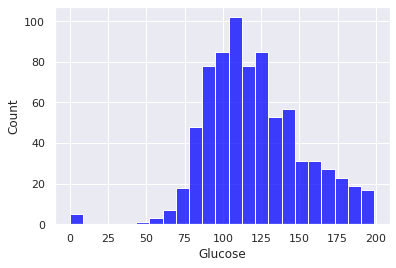

In [45]:
#distribution plot for glucose column
sns.histplot(data=diabetes_df["Glucose"],color="blue")
plt.show()

#### Counts of NAn Values in dataset as per the features

In [13]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[[
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


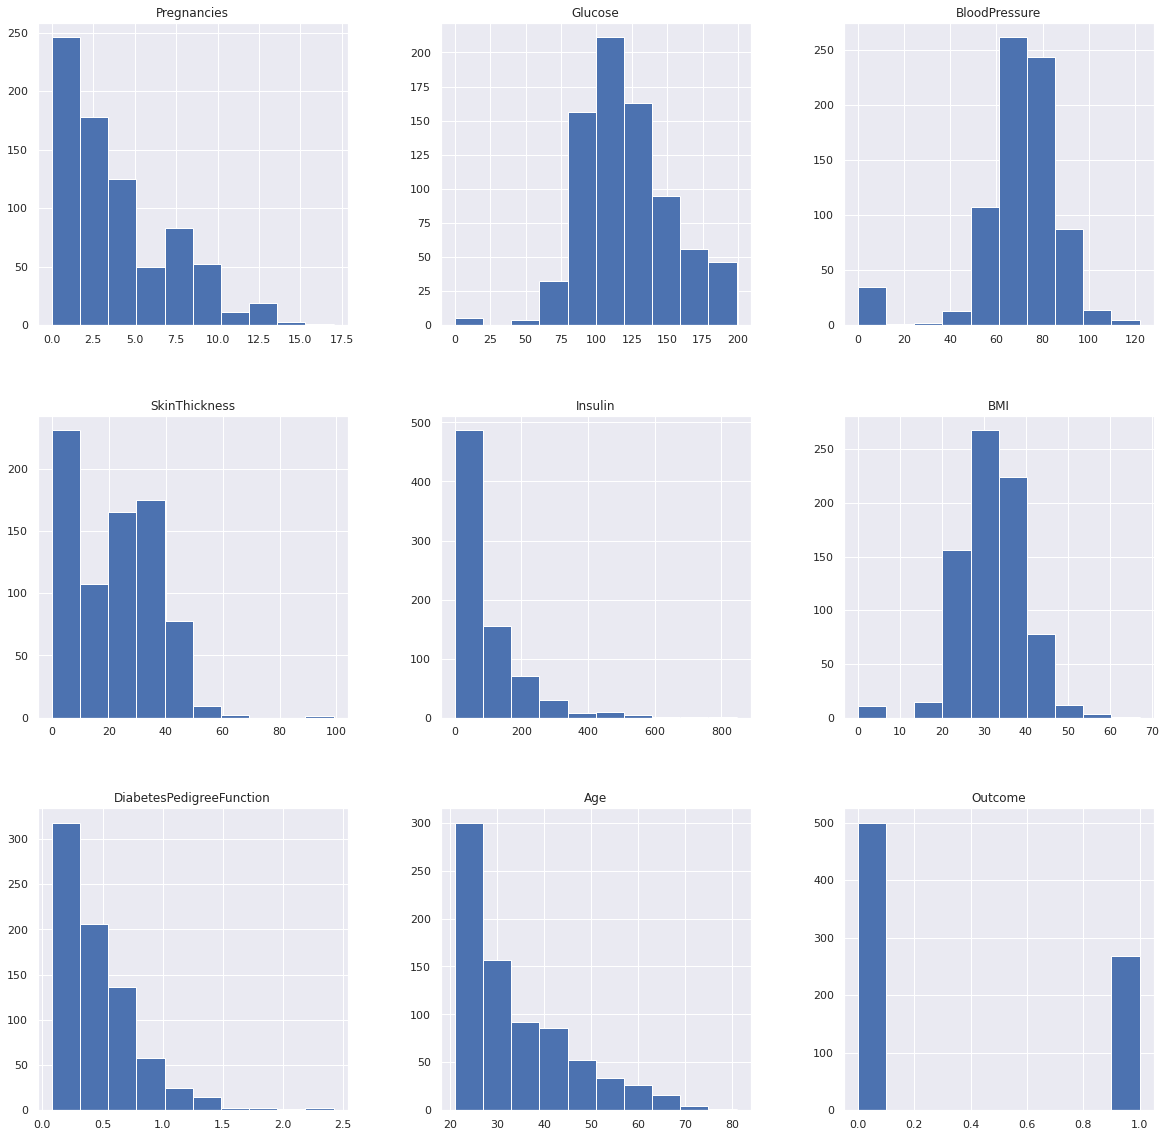

In [14]:
p = diabetes_df.hist(figsize=(20, 20))


In [15]:
diabetes_df_copy['Glucose'].fillna(
    diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(
    diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['SkinThickness'].fillna(
    diabetes_df_copy['SkinThickness'].median(), inplace=True)
diabetes_df_copy['Insulin'].fillna(
    diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)


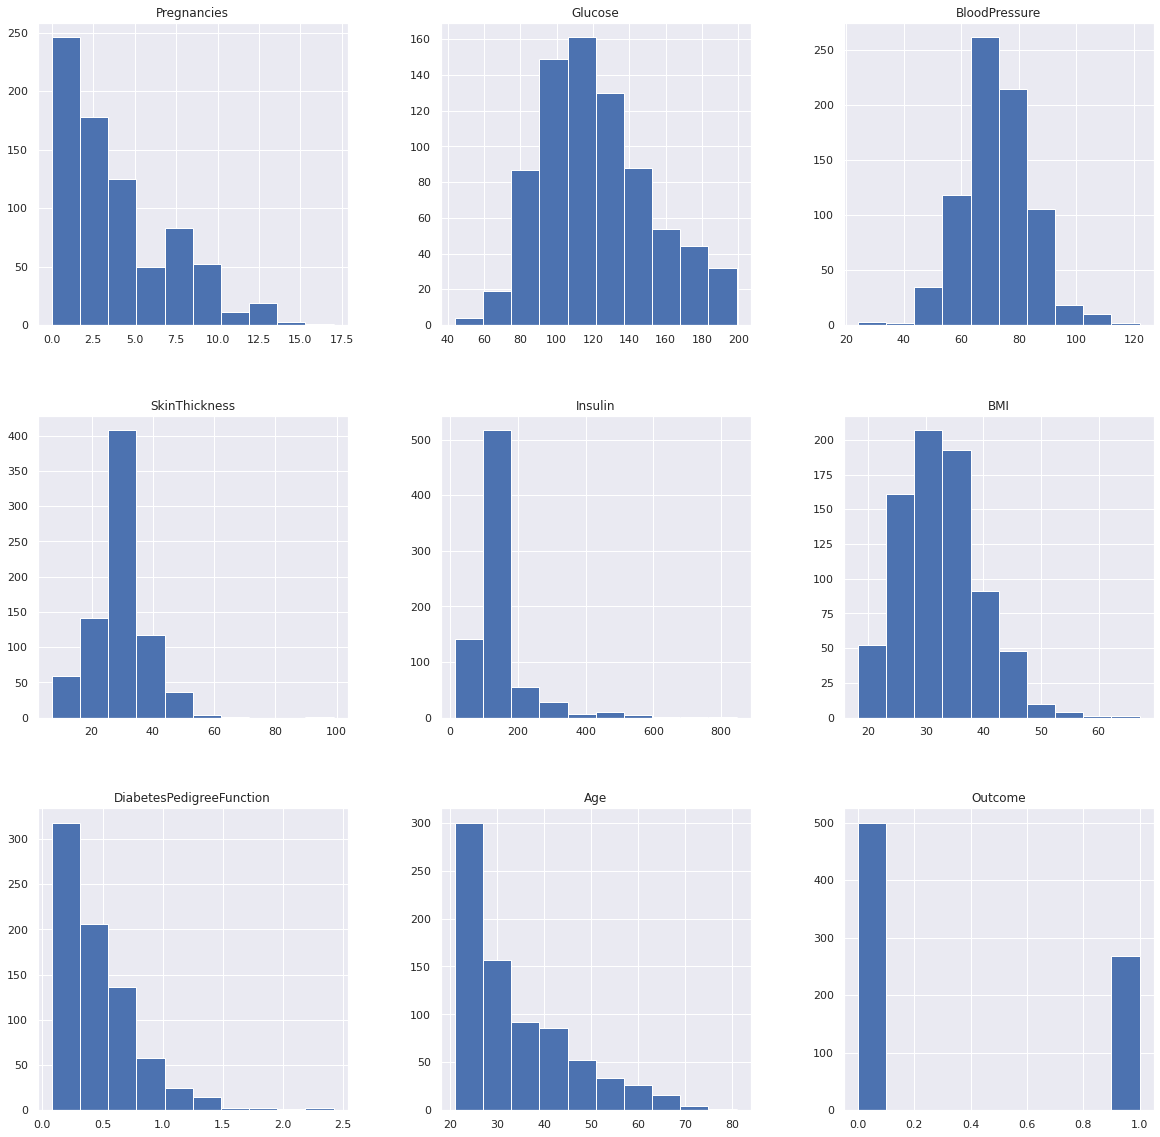

In [16]:
p = diabetes_df_copy.hist(figsize=(20, 20))


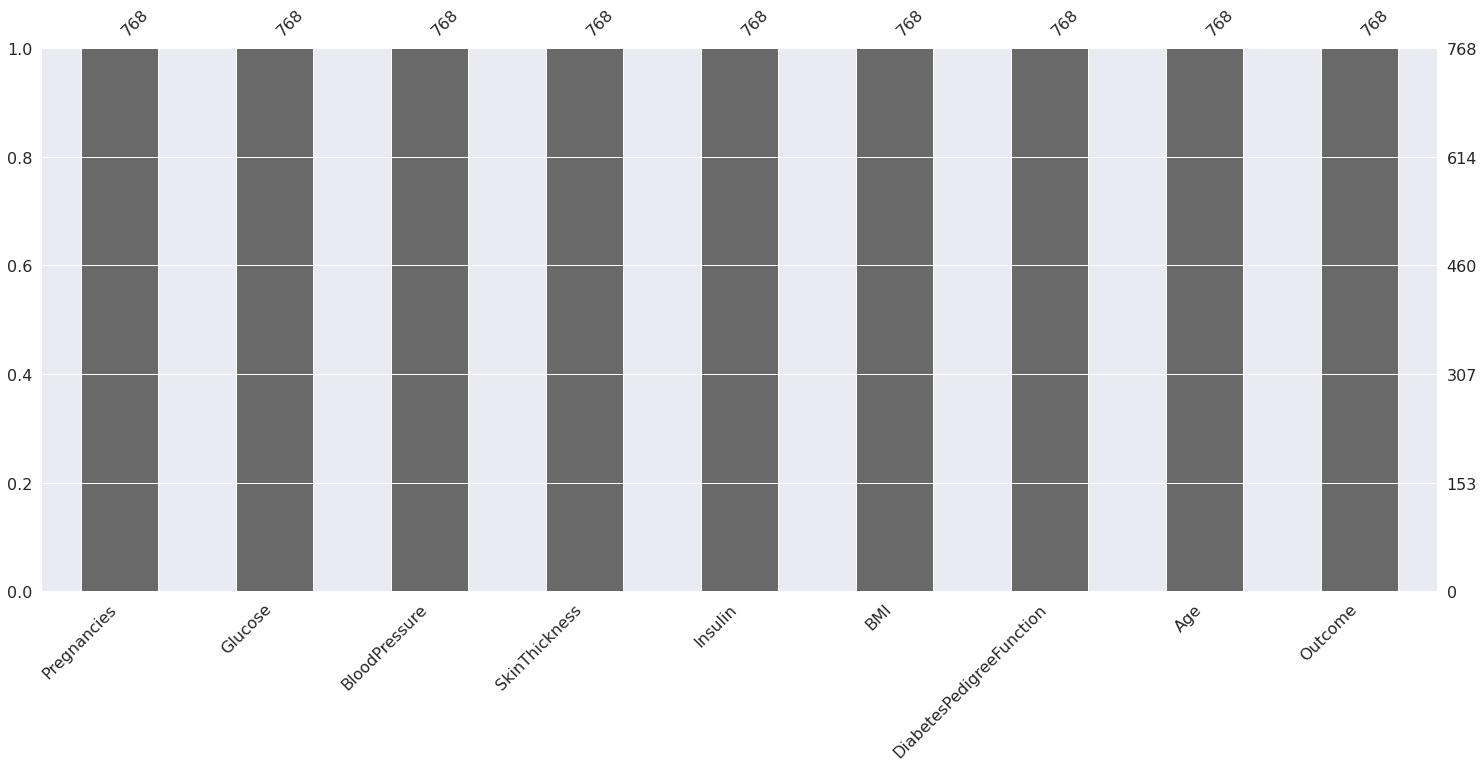

In [17]:
p = msno.bar(diabetes_df)


0    500
1    268
Name: Outcome, dtype: int64


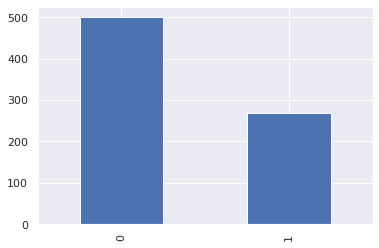

In [18]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p = diabetes_df.Outcome.value_counts().plot(kind="bar")


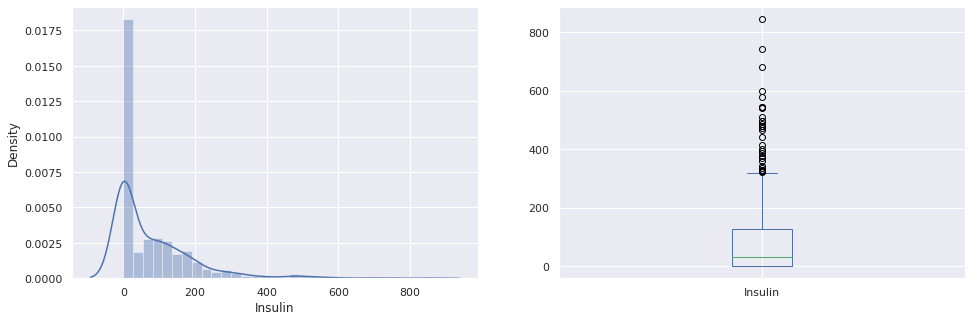

In [19]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16, 5))
plt.show()


### Heatmap Visualisation


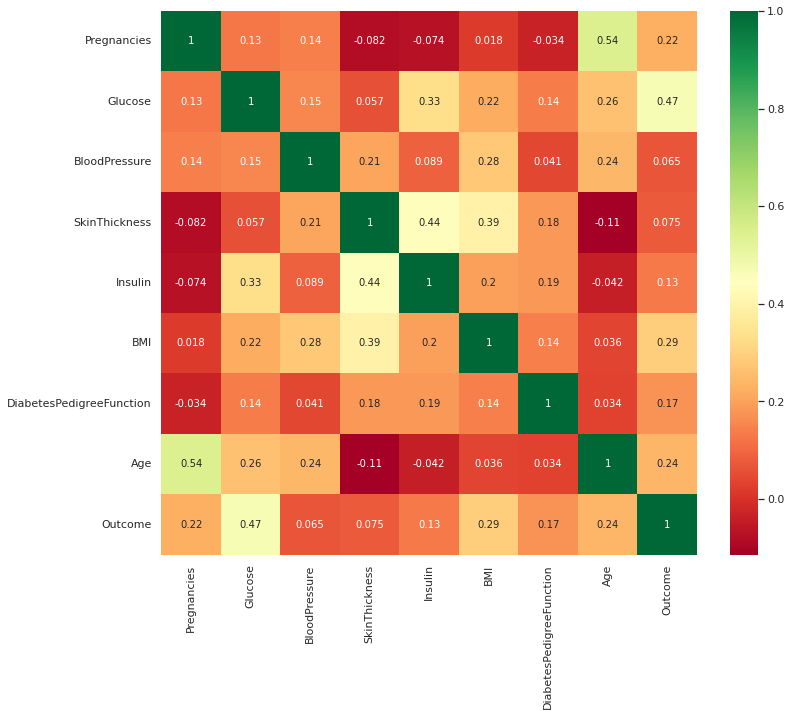

In [20]:
plt.figure(figsize=(12, 10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')


In [49]:
diabetes_df_copy.head(30)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


In [22]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome", 'BloodPressure', 'SkinThickness',], axis=1),), columns=['Pregnancies',
                                                                                                                              'Glucose',  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,0.316566,1.549303,5.484909,-0.020496


In [23]:
y = diabetes_df_copy.Outcome
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']


#### Train and Testing

In [25]:
# Split the dataset in train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=7)


### RFC 

In [26]:
# Random Forest Classifier

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=200)
lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)

rfc_train = rfc.predict(X_train)
lr_train = lr.predict(X_train)


print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))
print("LR Accuracy_Score =", format(metrics.accuracy_score(y_train, lr_train)))


Accuracy_Score = 1.0
LR Accuracy_Score = 0.77431906614786


In [27]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("RF Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

preds = lr.predict(X_test)
print(" LR Accuracy_Score =", format(metrics.accuracy_score(y_test, preds)))


RF Accuracy_Score = 0.7755905511811023
 LR Accuracy_Score = 0.7874015748031497


### Decision Tree

In [29]:
 #Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))


Accuracy Score = 0.7125984251968503


In [30]:

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


[[128  34]
 [ 39  53]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       162
           1       0.61      0.58      0.59        92

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.69       254
weighted avg       0.71      0.71      0.71       254



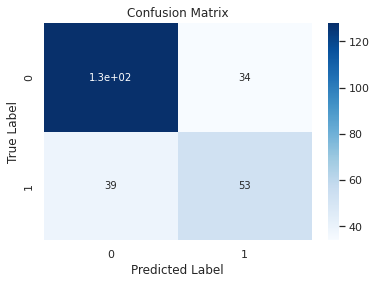

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       162
           1       0.61      0.58      0.59        92

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.69       254
weighted avg       0.71      0.71      0.71       254



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Create the confusion matrix and classification report
confusion_mat = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)


sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report with color
print(classification_rep)


### xgboost

In [53]:
# !pip install xgboost
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier(gamma=0)
# xgb_model.fit(X_train, y_train)


In [33]:
# from sklearn import metrics

# xgb_pred = xgb_model.predict(X_test)
# print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))


In [34]:
# print(confusion_matrix(y_test, xgb_pred))
# print(classification_report(y_test,xgb_pred))


### Support Vector Machine(SVM)

In [51]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)


svc_pred = svc_model.predict(X_test)

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))


Accuracy Score = 0.7480314960629921


In [52]:

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



In [37]:
rfc.feature_importances_


array([0.08265959, 0.2479028 , 0.09043678, 0.07279084, 0.07601757,
       0.17068654, 0.12653925, 0.13296664])

<AxesSubplot:>

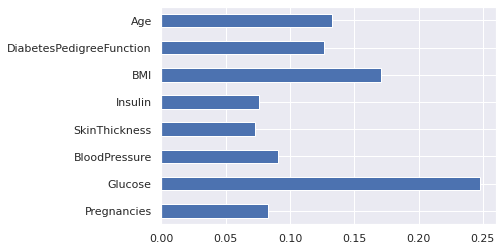

In [38]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))


### Save model 

In [ ]:
# import pickle as pk

# # Save trained model to file
# pk.dump(lr, open("model.pkl", "wb"))


In [56]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)
pickle.dump(saved_model, open("model.pkl1", "wb"))



### Use saved model to make prediction

In [57]:

rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [40]:
X_test.head(1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.58,24


In [41]:
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
diabetes_df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Testing the model

In [43]:
rfc.predict([[0, 100, 90, 40, 108, 30.2, 2.228, 33]])  # 4th patient

# Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.


array([0])

In [58]:
rfc.predict([[1,126,60,0,0,30.1,0.349,47]])  # 763 th patient


array([1])

### Thanks For Your Time And Question